In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
#데이터 불러오기
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [2]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))
unique,counts=np.unique(y_test,return_counts=True)
print('Test labels:',dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


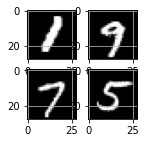

In [3]:
# 4개의 임의 표본 추출하기
indices=np.random.randint(0,x_train.shape[0],size=4)
images=x_train[indices]
labels=y_train[indices]
# 4개 표본 그림그리기
plt.figure(figsize=(2,2))
for i in range(len(indices)):
    plt.subplot(2,2,i+1)
    image=images[i]
    plt.imshow(image, cmap='gray')
    plt.grid('off')
plt.show()

In [7]:
# one-hot coding을 위한 라이브러리 불러오기
from tensorflow.keras.utils import plot_model,to_categorical
num_features=784  #x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(-1,num_features).astype('float32')# 또는 np.reshape(x_train, (-1,num_features)).astype('float32')
x_test=x_test.reshape(-1,num_features).astype('float32')

#reshape안에 '-1'대신 x_train.shape[0]을 써도 되지만 '-1'을 해줌으로써 해당 axis의 값을 스스로 계산하게 한다.
#예를 들어 x의 shape이 (100,200,3)일 때 x.reshape(-1,100)으로 하면 x의 shape은 (600,100)으로 된다.

x_train=x_train/255.
x_test=x_test/255.

# 10개의 범주형 자료를 one-hot 벡터로 바꿔주기
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_train.shape[1]
print(y_train.shape)

(60000, 10)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


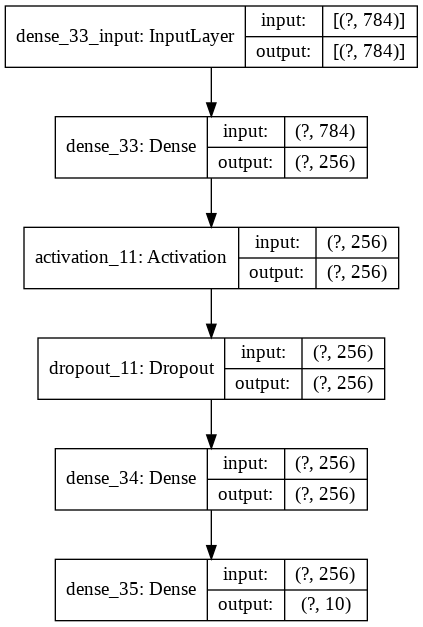

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
#2개의 은닉층과 1개의 출력층으로 구성된 MLP모형
model=Sequential()
model.add(Dense(256,input_dim=num_features)) #input은 1D tensor
model.add(Activation('relu'))
model.add(Dropout(0.45))
# 또는 model.add(Dense(256, input_dim=num_features,activation='relu'))로 Dense와 Activation을 함께 쓸 수 있음
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()
plot_model(model, show_shapes=True)

In [51]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


In [52]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=32)


Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7078 - accuracy: 0.7776
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3393 - accuracy: 0.8970
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2648 - accuracy: 0.9197
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2217 - accuracy: 0.9333
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1970 - accuracy: 0.9412
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1774 - accuracy: 0.9470
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1629 - accuracy: 0.9514
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1512 - accuracy: 0.9537
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1413 - accuracy: 0.9566
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.132

In [53]:
import pandas as pd
result_train=model.evaluate(x_train,y_train)
result_test=model.evaluate(x_test,y_test)
print(result_train)
print(result_test)
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred.head()

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9783
[0.03133650869131088, 0.9900166392326355]
[0.07736101746559143, 0.9782999753952026]


,0,1,2,3,4,5,6,7,8,9
0,4.617648e-11,3.696060e-11,0.000002,1.296508e-05,7.796001e-15,2.505991e-09,3.057922e-23,9.999839e-01,1.378471e-09,7.365257e-07
1,4.595086e-12,6.462445e-05,0.999920,1.585401e-05,3.583386e-18,4.002840e-08,4.189022e-09,1.741900e-12,4.997153e-09,1.415417e-21
2,7.278043e-09,9.994445e-01,0.000012,2.384652e-06,3.194737e-06,7.450292e-06,5.433475e-07,3.666456e-04,1.627147e-04,7.087043e-08
3,9.999452e-01,5.173370e-12,0.000048,1.289142e-07,3.679773e-08,1.280067e-06,7.983662e-07,4.405159e-07,4.190345e-09,3.746103e-06
4,3.153278e-09,1.641663e-13,0.000001,9.555379e-09,9.995750e-01,1.864367e-07,9.714258e-10,2.099519e-05,4.885384e-09,4.028095e-04
